KNN
Feature Extraction Method: GLCM
Features Taken with distance = 5, angle = 0,45,90,135,180,225,270,315) (total 40 features)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/GLCM_5Distance"

/content/drive/MyDrive/Machine Learning/GLCM_5Distance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
import time

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

# for k fold cross validation
x_new = list()
y_new = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset1 = pd.read_csv('GLCM_train.csv')
print(dataset1)

      Unnamed: 0   Energy0     Corr0  Diss_sim0  Homogen0    Contrast0  \
0              0  0.012452  0.271204  24.863410  0.039734  1013.183564   
1              0  0.013405  0.441275  20.117205  0.050860   657.472590   
2              0  0.013246  0.376922  21.538026  0.047030   747.128641   
3              0  0.014207  0.307237  20.938308  0.047282   713.287026   
4              0  0.011498  0.413125  24.385974  0.041033   961.435462   
...          ...       ...       ...        ...       ...          ...   
1435           0  0.027185  0.906224   5.758308  0.194348    75.368103   
1436           0  0.044096  0.719087   6.977718  0.286380   336.668385   
1437           0  0.033335  0.835101   8.238564  0.250575   321.118462   
1438           0  0.034867  0.864708  12.198667  0.184691   662.054513   
1439           0  0.041291  0.818318   6.795128  0.248586   213.973590   

       Energy1     Corr1  Diss_sim1  Homogen1  ...   Energy6     Corr6  \
0     0.012436  0.232223  25.488625  

In [ ]:
x = dataset1.iloc[:,1:].values
print(len(x[0]))

40


In [ ]:
print(x)

[[1.24517214e-02 2.71204228e-01 2.48634103e+01 ... 2.50577884e+01
  4.05208138e-02 1.01923751e+03]
 [1.34048379e-02 4.41275423e-01 2.01172051e+01 ... 1.96631352e+01
  5.13562318e-02 6.26654545e+02]
 [1.32462640e-02 3.76921626e-01 2.15380256e+01 ... 2.22071793e+01
  4.62140829e-02 7.96455565e+02]
 ...
 [3.33351676e-02 8.35100932e-01 8.23856410e+00 ... 7.39074865e+00
  2.49918243e-01 2.54045684e+02]
 [3.48665720e-02 8.64707627e-01 1.21986667e+01 ... 1.07429456e+01
  1.96037798e-01 5.11558647e+02]
 [4.12908734e-02 8.18317591e-01 6.79512821e+00 ... 6.07725948e+00
  2.54339847e-01 1.77470117e+02]]


In [ ]:
print(x[0])

[1.24517214e-02 2.71204228e-01 2.48634103e+01 3.97342203e-02
 1.01318356e+03 1.24357596e-02 2.32222993e-01 2.54886245e+01
 3.92970938e-02 1.06972384e+03 1.24363468e-02 2.77652158e-01
 2.49060000e+01 3.99898759e-02 1.01256482e+03 1.24387017e-02
 2.68385279e-01 2.50577884e+01 4.05208138e-02 1.01923751e+03
 1.24517214e-02 2.71204228e-01 2.48634103e+01 3.97342203e-02
 1.01318356e+03 1.24357596e-02 2.32222993e-01 2.54886245e+01
 3.92970938e-02 1.06972384e+03 1.24363468e-02 2.77652158e-01
 2.49060000e+01 3.99898759e-02 1.01256482e+03 1.24387017e-02
 2.68385279e-01 2.50577884e+01 4.05208138e-02 1.01923751e+03]


In [ ]:
print(len(x))

1440


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,240):
        y.append(i)


In [ ]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
X_train = x
y_train = y

In [ ]:
dataset1 = pd.read_csv('GLCM_test.csv')
print(dataset1)

     Unnamed: 0   Energy0     Corr0  Diss_sim0  Homogen0    Contrast0  \
0             0  0.012284  0.311787  24.820462  0.041106  1019.260359   
1             0  0.011590  0.532045  22.631256  0.045268   834.160744   
2             0  0.011649  0.358521  25.117949  0.042049  1040.750256   
3             0  0.011251  0.359499  26.398513  0.038530  1127.812256   
4             0  0.011823  0.316927  25.709205  0.039344  1092.402744   
..          ...       ...       ...        ...       ...          ...   
355           0  0.046701  0.977281   3.292744  0.320080    32.446641   
356           0  0.052898  0.930696   2.625872  0.340889    22.747872   
357           0  0.039938  0.927689   5.251282  0.195772    64.931487   
358           0  0.033672  0.903525   6.170615  0.219845   171.253436   
359           0  0.041404  0.888943   5.009615  0.213127    74.173205   

      Energy1     Corr1  Diss_sim1  Homogen1  ...   Energy6     Corr6  \
0    0.012229  0.295269  25.150953  0.040658  ... 

In [ ]:
x = dataset1.iloc[:,1:].values
print(len(x[0]))

40


In [ ]:
print(x)
print(x[0])

[[1.22837374e-02 3.11786677e-01 2.48204615e+01 ... 2.52919877e+01
  4.12090470e-02 1.05380630e+03]
 [1.15904810e-02 5.32045089e-01 2.26312564e+01 ... 2.30294409e+01
  4.41729560e-02 8.60134241e+02]
 [1.16493814e-02 3.58520753e-01 2.51179487e+01 ... 2.56813307e+01
  3.83698324e-02 1.07731544e+03]
 ...
 [3.99379203e-02 9.27688946e-01 5.25128205e+00 ... 9.74463765e+00
  1.72121360e-01 4.95202312e+02]
 [3.36716754e-02 9.03525199e-01 6.17061538e+00 ... 1.14735267e+01
  1.89257210e-01 7.34857429e+02]
 [4.14036432e-02 8.88943344e-01 5.00961538e+00 ... 9.31156289e+00
  1.68402502e-01 3.99055940e+02]]
[1.22837374e-02 3.11786677e-01 2.48204615e+01 4.11062064e-02
 1.01926036e+03 1.22285026e-02 2.95268763e-01 2.51509527e+01
 4.06580398e-02 1.04353564e+03 1.22668125e-02 3.37588169e-01
 2.45161795e+01 4.24323229e-02 9.88077615e+02 1.21978769e-02
 2.88452187e-01 2.52919877e+01 4.12090470e-02 1.05380630e+03
 1.22837374e-02 3.11786677e-01 2.48204615e+01 4.11062064e-02
 1.01926036e+03 1.22285026e-02 2.9

In [ ]:
print(len(x))

360


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,60):
        y.append(i)


In [ ]:
X_test = x
y_test = y

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1440
360
1440
360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 40) (1440,)
Test set: (360, 40) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 40)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 40)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
k_value = list()

In [ ]:

for k in range(1,101,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # print(metrics.accuracy_score(y_test, y_pred_test))
    # print(confusion_matrix(y_test, y_pred_test))
    # print(classification_report(y_test,y_pred_test))
    k_value.append(k)
    train_accuracy.append((metrics.accuracy_score(y_train, y_pred)))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))


In [ ]:
print(train_accuracy)
print(test_accuracy)
print(k_value)

[1.0, 0.9395833333333333, 0.9180555555555555, 0.9006944444444445, 0.8868055555555555, 0.8826388888888889, 0.8784722222222222, 0.8729166666666667, 0.8652777777777778, 0.8597222222222223, 0.8513888888888889, 0.8513888888888889, 0.8465277777777778, 0.8423611111111111, 0.8381944444444445, 0.8270833333333333, 0.8243055555555555, 0.825, 0.8208333333333333, 0.8166666666666667, 0.8159722222222222, 0.8118055555555556, 0.8097222222222222, 0.8069444444444445, 0.8027777777777778, 0.8027777777777778, 0.7965277777777777, 0.7923611111111111, 0.7923611111111111, 0.7888888888888889, 0.7909722222222222, 0.7888888888888889, 0.7854166666666667, 0.7833333333333333, 0.7784722222222222, 0.775, 0.7715277777777778, 0.7652777777777777, 0.7618055555555555, 0.7590277777777777, 0.7555555555555555, 0.75, 0.75, 0.7479166666666667, 0.7479166666666667, 0.7465277777777778, 0.7444444444444445, 0.7416666666666667, 0.7402777777777778, 0.7388888888888889]
[0.8583333333333333, 0.85, 0.8166666666666667, 0.7972222222222223, 0

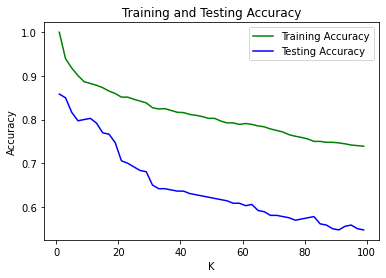

In [ ]:
plt.plot(k_value, train_accuracy, 'g', label='Training Accuracy')
plt.plot(k_value, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.85
[[60  0  0  0  0  0]
 [ 0 56  0  2  0  2]
 [12  0 45  3  0  0]
 [14  2  6 38  0  0]
 [ 0  0  0  3 57  0]
 [ 7  3  0  0  0 50]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.78        60
           1       0.92      0.93      0.93        60
           2       0.88      0.75      0.81        60
           3       0.83      0.63      0.72        60
           4       1.00      0.95      0.97        60
           5       0.96      0.83      0.89        60

    accuracy                           0.85       360
   macro avg       0.87      0.85      0.85       360
weighted avg       0.87      0.85      0.85       360

